In [140]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [4]:
!pwd

/c/Users/A2276061/Documents/GMM


In [55]:
df = pd.read_csv("hospit-days.csv", parse_dates=True)

In [158]:
test = pd.read_csv("hospit-days.csv", index_col=0, parse_dates=True)

In [159]:
print(test.head())

                   Out  Days
In                          
2006-08-08  11/08/2006     3
2004-11-19  25/11/2004     6
2006-08-08  11/08/2006     3
2006-08-08  11/08/2006     3
2006-08-08  11/08/2006     3


In [57]:
df[0:5]

,In,Out,Days
0,08/08/2006,11/08/2006,3
1,19/11/2004,25/11/2004,6
2,08/08/2006,11/08/2006,3
3,08/08/2006,11/08/2006,3
4,08/08/2006,11/08/2006,3


In [31]:
DateIn = df["In"]
AvgDays = df["Days"]

<function matplotlib.pyplot.show>

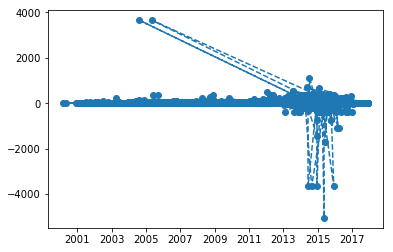

In [89]:
plt.plot_date(DateIn,AvgDays, ls='--')
plt.show

This is a kind of plot that depends on a X axis and Y axis

Anyway we shall follow another approach

When we use df.plot() and plt.show(), matplotlib infers that we are making a time series, so we create a new data frame only with the two columns we want

In [103]:
raw_data = {'In': DateIn, 'Days': AvgDays}
df0 = pd.DataFrame(raw_data, columns = ['In', 'Days'])
df0.head()

,In,Days
0,08/08/2006,3
1,19/11/2004,6
2,08/08/2006,3
3,08/08/2006,3
4,08/08/2006,3


<function matplotlib.pyplot.show>

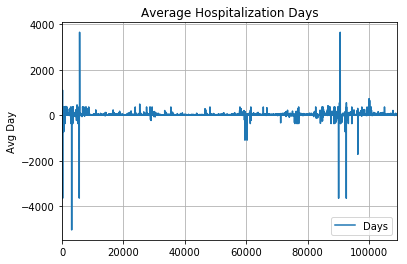

In [74]:
df0.plot()
plt.title("Average Hospitalization Days")
plt.ylabel("Avg Day")
plt.grid(True)
plt.show

In [91]:
df0_sort = df0.sort(['Days'], ascending=False)
df0_sort.count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In      109048
Days    109048
dtype: int64

Now we now the outliers of days of hospitalization we have to see every single day what happened, we have to make a list of all those

Then we have to eliminate in two ways:
    + 1 The negatives, there is no posibilities for negatives here
    + 2 More than 365 days what happen here
    + 3 Is it posible hospitalization between 0 and one year?
    + Let's make a variance method to deprecate all those more than 10 days for example, in order of the variance measure after this, plot again

In [93]:
#let's see all days in negatives we have
df0[df0['Days'] < 0].count()

In      227
Days    227
dtype: int64

The solution here should be from the extraction, we shall exclude the diferences between date in minus day out in negative, then we made the average by day

In [95]:
df1 = df0[df0['Days'] > 0]

<function matplotlib.pyplot.show>

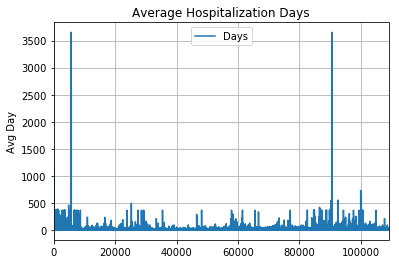

In [96]:
df1.plot()
plt.title("Average Hospitalization Days")
plt.ylabel("Avg Day")
plt.grid(True)
plt.show

In [98]:
#let's see now all the cases where is more than 1 year, it means (likely) is a system issue
df0[df0['Days'] > 365].count()

In      57
Days    57
dtype: int64

In [109]:
df2 = df0[(df0['Days'] < 366) & (df0['Days'] > 0)]
df2.head()

,In,Days
0,08/08/2006,3
1,19/11/2004,6
2,08/08/2006,3
3,08/08/2006,3
4,08/08/2006,3


In [116]:
print(df.shape)

(109048, 2)


<function matplotlib.pyplot.show>

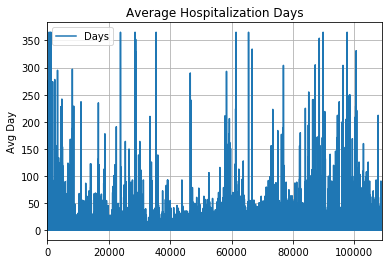

In [111]:
df2.plot()
plt.title("Average Hospitalization Days")
plt.ylabel("Avg Day")
plt.grid(True)
plt.show

In [112]:
df2.describe()

,Days
count,108764.000000
mean,4.721737
std,11.373258
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,365.000000


In [127]:
#The rule we gonna use is excluding all the data with days more than 2 estandart deviatin_
two_dev = 2*df2.std().astype(int)
two_dev

Days    22
dtype: int32

In [132]:
df3 = df2[df2['Days'] < 22]
df3.count()

In      104989
Days    104989
dtype: int64

<function matplotlib.pyplot.show>

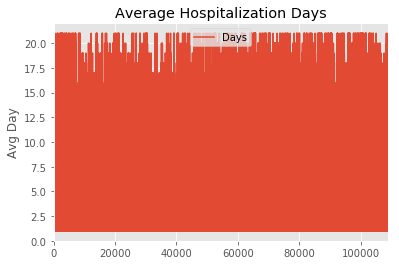

In [139]:
mpl.style.use('ggplot')
df3.plot()
plt.title("Average Hospitalization Days")
plt.ylabel("Avg Day")
plt.grid(True)
plt.show

In [134]:
df3.count()/df0.count()
#this is the percentage of the data contained within 2 standart deviation

In      0.962778
Days    0.962778
dtype: float64

In [135]:
df3.describe()

,Days
count,104989.000000
mean,3.255836
std,3.264455
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,21.000000


On average the patients has 3+-3 days of hospitalization over the time.  

From here we may set some questions about it  

- Avg days grouped by disease
- Avg days grouped by age, gender
- Avg days grouped by participant (agent, doctor, ofice)
- Avg days grouped by season
     

In order to have some insight about the time series we gonna wrang the dates

In [146]:
df3.dtypes
#it is such a shame to notice here that the variable In is an object, we need datetime instead

In      object
Days     int64
dtype: object

In [163]:
df3['In'] = pd.to_datetime(df3['In'])
#the error is telling me .loc[row_indexer,col_indexer] = value instead is better

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [166]:
df3.dtypes
#nos we have datetime as we wanted

In      datetime64[ns]
Days             int64
dtype: object

In [167]:
#pd.Series(np.random.randn(150).cumsum(), index=pd.date_range('2000-1-1', periods=150, freq='B'))
#just an example of series generated

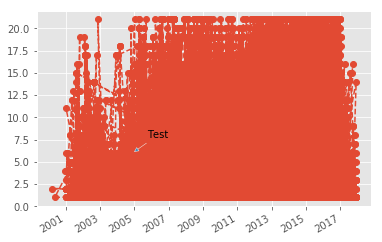

In [196]:
x, y  = df3['In'], df3['Days']

fig, ax = plt.subplots()
ax.plot_date(x, y, linestyle='--')

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

#This is just an example of annotation
ax.annotate('Test', (mdates.date2num(x[1]), y[1]), xytext=(15, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

fig.autofmt_xdate()
plt.show()

Well, it is not very clear as we see, is it possible to check it out aggregated by month and year

In [183]:
months = df3['In'].dt.to_period("M")
dfm = df3.groupby(months).mean()
dfm.head()

,Days
In,
2000-03,2.00
2000-05,1.00
2000-12,3.50
2001-01,2.80
2001-02,1.75


<function matplotlib.pyplot.show>

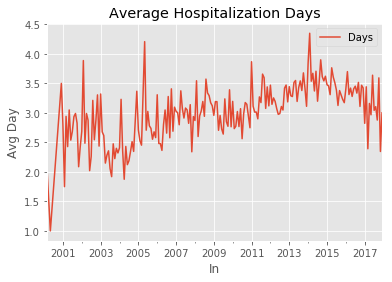

In [198]:
dfm.plot()
plt.title("Average Hospitalization Days")
plt.ylabel("Avg Day")
plt.grid(True)
plt.show

Now what about years

In [200]:
dfy = df3.groupby(df3['In'].map(lambda x: x.year)).mean()
dfy.head()

,Days
In,
2000,2.500000
2001,2.650817
2002,2.814274
2003,2.468085
2004,2.535714


<function matplotlib.pyplot.show>

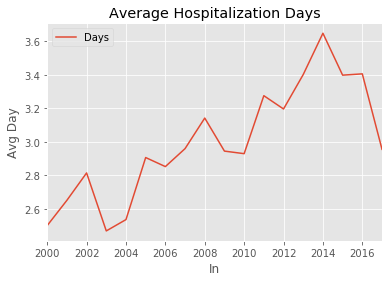

In [201]:
dfy.plot()
plt.title("Average Hospitalization Days")
plt.ylabel("Avg Day")
plt.grid(True)
plt.show

Hospitalizations Average Days Over The Years

(array([  2.40000000e+01,   5.60000000e+02,   4.16600000e+03,
          1.57400000e+04,   3.09110000e+04,   2.98990000e+04,
          1.47510000e+04,   3.48700000e+03,   4.29000000e+02,
          3.30000000e+01]),
 array([-4.23630109, -3.38229416, -2.52828722, -1.67428029, -0.82027335,
         0.03373358,  0.88774052,  1.74174745,  2.59575439,  3.44976132,
         4.30376826]),
 <a list of 10 Patch objects>)

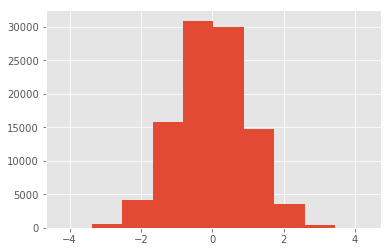

In [138]:
#this is just an example
mpl.style.available
[u'dark_background', u'grayscale', u'ggplot']
mpl.style.use('ggplot')
plt.hist(np.random.randn(100000))